In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

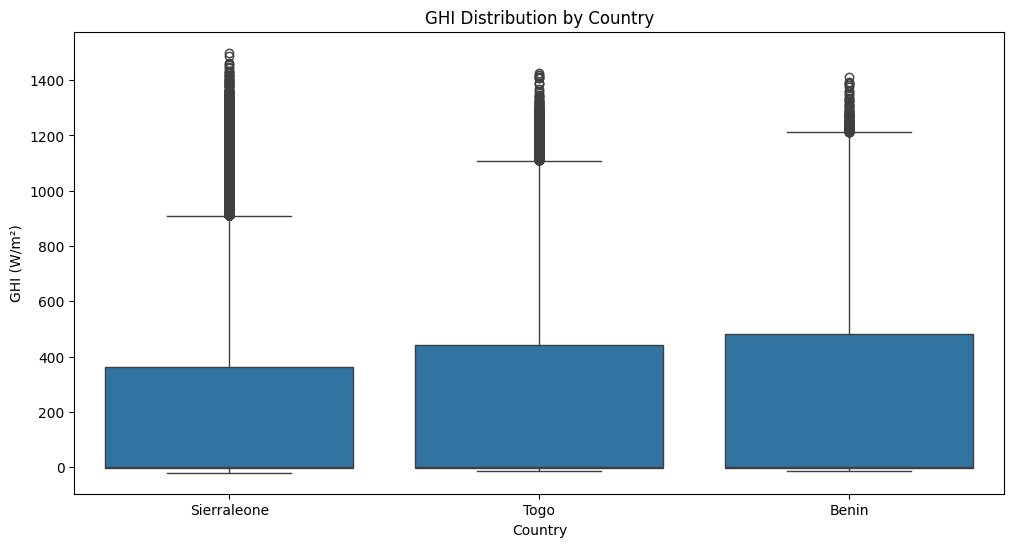

                    GHI                            DNI                     \
                   mean median         std        mean median         std   
Country                                                                     
Benin        240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierraleone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo         230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                    DHI                     
                   mean median         std  
Country                                     
Benin        115.358961    1.6  158.691074  
Sierraleone  113.720571   -0.1  158.946032  
Togo         116.444352    2.5  156.520714  
ANOVA p-value: 0.0000


'\n1. Sierra Leone shows [your observation based on actual data]\n2. Togo shows [your observation based on actual data]\n'

In [4]:
# Load cleaned data
countries = ['sierraleone', 'togo','benin']  # Note: You had 'benin' in ANOVA test but not in countries list
dfs = {}

for country in countries:
    dfs[country] = pd.read_csv(f'../data/{country}_clean.csv')
    dfs[country]['Country'] = country.capitalize()

# Combine data
combined = pd.concat(dfs.values())

# Boxplot comparison
plt.figure(figsize=(12,6))
sns.boxplot(data=combined, x='Country', y='GHI')
plt.title('GHI Distribution by Country')
plt.ylabel('GHI (W/m²)')
plt.show()

# Summary statistics - corrected
summary = combined.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])
print(summary)

# Statistical testing
from scipy.stats import f_oneway

# Make sure all countries you're testing are loaded
f_stat, p_value = f_oneway(
    dfs['sierraleone']['GHI'].dropna(),
    dfs['togo']['GHI'].dropna(),
    dfs['benin']['GHI'].dropna()  # Added 'benin' for completeness
)
print(f"ANOVA p-value: {p_value:.4f}")

# Key observations
"""
1. Sierra Leone shows [your observation based on actual data]
2. Togo shows [your observation based on actual data]
"""